In [3]:
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from copy import deepcopy
from matplotlib.colors import Normalize
import matplotlib
from matplotlib.ticker import ScalarFormatter

## Load data

See [pyvista plotting documentation](https://docs.pyvista.org/version/stable/examples/02-plot/) for many examples

In [6]:
filepath = "out.200.vtk"
reader = pv.get_reader(filepath)
mesh = reader.read()

Find out the available fields

In [8]:
scalar_field_names = mesh.cell_data.keys()
print(scalar_field_names)

['0', '1', '2', '3', '4']


Plot the first scalar field

In [10]:
mesh.plot(scalars=scalar_field_names[0])

Widget(value='<iframe src="http://localhost:45009/index.html?ui=P_0x7f76aa094490_1&reconnect=auto" class="pyvi…

[Slicing data](https://docs.pyvista.org/version/stable/examples/01-filter/slicing.html)

In [11]:
slice = mesh.slice(normal=[0, 1, 0])
slice.plot(scalars=scalar_field_names[0])

Widget(value='<iframe src="http://localhost:45009/index.html?ui=P_0x7f76a8270280_2&reconnect=auto" class="pyvi…

## Extract data and plot with matplotlib

In [38]:
cell_centers = np.array(mesh.cell_centers().points)
field_0 = np.array(mesh.cell_data[scalar_field_names[0]])
slice_centers = np.array(slice.cell_centers().points)
slice_0 = np.array(slice.cell_data[scalar_field_names[0]])
slice_1 = np.array(slice.cell_data[scalar_field_names[1]])

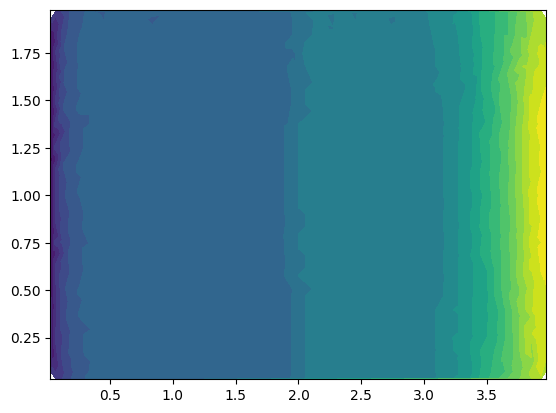

In [24]:
plt.tricontourf(cell_centers[:, 0], cell_centers[:, 1], field_0, levels=20)

The data is unordered in x, (slice_centers[0]), so we need to sort

In [39]:
sort_order = np.argsort(slice_centers[:, 0])
slice_centers = slice_centers[sort_order]
slice_0 = slice_0[sort_order]
slice_1 = slice_1[sort_order]

In [40]:
plt.plot(slice_centers[:, 0], slice_0)
plt.plot(slice_centers[:, 0], slice_1)

## Nicer matplotlib plots (example with mosaic plot)

first, find the minimal and maximal values of your data, if you want to have a common colorbar

In [41]:
plot_y_min = np.min([slice_0.min(), slice_1.min(), field_0.min()])
plot_y_max = np.max([slice_0.max(), slice_1.max(), field_0.max()])

(0.0, 1.0, 0.0, 1.0)

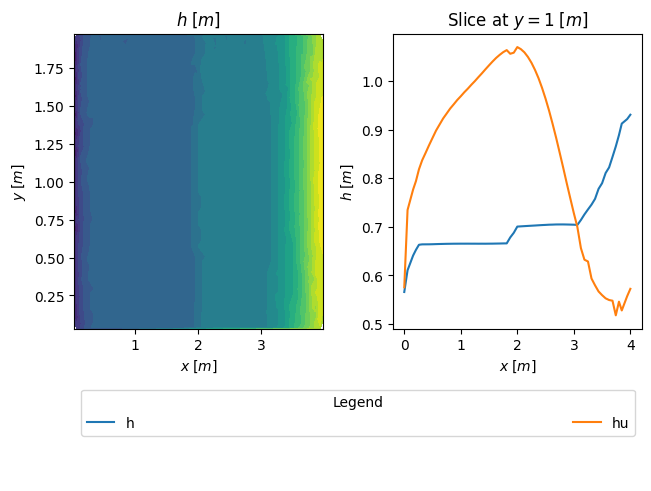

In [46]:
fig = plt.figure(constrained_layout=True)
ax = fig.subplot_mosaic([[0, 1], ["legend", "legend"]], height_ratios=[3.0, 1.0])
sf = ScalarFormatter()
sf.set_scientific(False)
# sf.set_powerlimits((0., 0.))

ax[0].tricontourf(cell_centers[:, 0], cell_centers[:, 1], field_0, levels=20)
ax[1].plot(slice_centers[:, 0], slice_0, label="h")
ax[1].plot(slice_centers[:, 0], slice_1, label="hu")

handles, labels = ax[1].get_legend_handles_labels()

ax["legend"].legend(handles, labels, ncol=len(labels), mode="expand")
ax["legend"].get_legend().set_title("Legend")

ax[0].set_title("$h\; [m]$")
ax[1].set_title("Slice at $y=1\; [m]$")
ax[0].set_xlabel("$x\; [m]$")
ax[0].set_ylabel("$y\; [m]$")
ax[1].set_xlabel("$x\; [m]$")
ax[1].set_ylabel("$h\; [m]$")
ax["legend"].axis("off")